# Equações diferenciais ordinárias

## Método de Runge–Kutta de ordem 4

O método de Runge–Kutta de quarta ordem (conhecido como RK4) é outro método que visa determinar a solução de uma EDO do tipo

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = f(x, t)
$$

integrando-a no tempo. Relembrando, chegamos à equação

\begin{align}
x(t + h) & = x(t) + \int_{t}^{t + h} f\left( x(t^\prime), t^\prime \right)\,\mathrm{d}t^\prime.
\end{align}

No método RK2, usamos dois passos para aproximar o valor da integral, o ponto inicial em $t$ e o ponto destino $t + h$, que ainda não conhecemos. Com RK4 tomamos mais dois pontos intermediários, calculados em $t + \frac{h}{2}$. A [dedução da fórmula RK4](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/pdvi-metodos_de_runge-kutta_explicitos.html) é parecida com a RK2, porém envolve resolver um sistema de equações (mais ou menos como fizemos com a regra de integração de Simpson), e resulta num conjunto de métodos possíveis. O mais usado é

\begin{align}
k_1 &= h f(x, t) \\
k_2 &= h f(x + \frac{k_1}{2}, t + \frac{h}{2}) \\
k_3 &= h f(x + \frac{k_2}{2}, t + \frac{h}{2}) \\
k_4 &= h f(x + k_3, t + h) \\
x(t+h) &= x(t) + \frac 1 6 (k_1 + 2 k_2 + 2 k_3 + k_4).
\end{align}

Embora seja necessário calcular $f(x)$ 4 vezes a cada iteração, o RK4 é preciso até termos de ordem $h^4$, com erros da ordem de $h^5$.

### Exercício 1

Vamos resolver pela última vez o exemplo

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = - x^3 + \sin t.
$$

Primeiro, discretizamos o método RK4, fazendo $t = t_j$, $x(t) = x_j$, $t + h = t_{j + 1}$ e $x(t + h) = x_{j + 1}$. Assim,

\begin{align}
k_1 &= h f(x_j, t_j) \\
k_2 &= h f(x_j + \dfrac{k_1}{2}, t_j + \frac{h}{2}) \\
k_3 &= h f(x_j + \frac{k_2}{2}, t_j + \frac{h}{2}) \\
k_4 &= h f(x_j + k_3, t_j + h) \\
x_{j+1} &= x_j + \frac 1 6 (k_1 + 2 k_2 + 2 k_3 + k_4).
\end{align}


Resolva a EDO usando o método RK4, para $0 < t < 30$, com $x=0$ em $t=0$, usando passos de $h = 0.5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

Text(0, 0.5, '$x$')

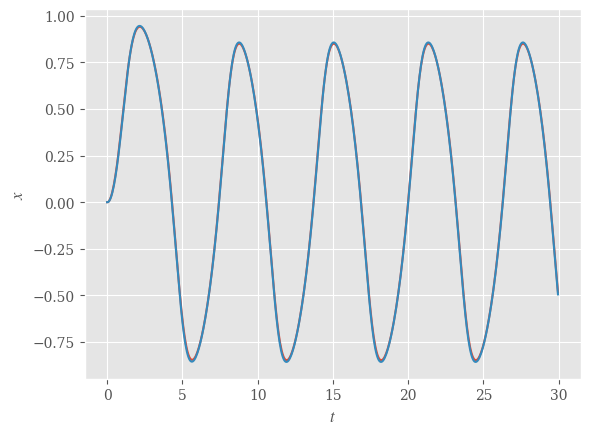

In [5]:
def f(x,t):
    return (-x)**3 + np.sin(t)

t0 = 0
tf = 30
h = 0.05
x0 = 0
N = int((tf-t0)/h)

x = np.zeros(N)
t = np.zeros(N)
x[0] = x0
t[0] = t0
x_e = np.zeros(N)
x_e[0] = x0

for j in range(N-1):
    t[j+1] = h * (j+1)
    k1 = h * f(x[j],t[j])
    k2 = h*f(x[j] + k1/2, t[j] + k1/2)
    k3 = h*f(x[j] + k2/2, t[j] + k2/2)
    k4 = h*f(x[j] + k3, t[j] + h)
    x[j+1] = x[j] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    x_e[j+1] = x_e[j] + h*f(x_e[j],t[j])

fig, ax = plt.subplots(1,1)
ax.plot(t,x)
ax.plot(t,x_e)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")

### Exercício 2

As equações de Lotka–Volterra são um modelo matemático de interações predador–presa entre espécies. Sejam duas variáveis $x$ e $y$ proporcionais às populações de de duas espécies, $x$ são capivaras (presas) e $y$ são as onças pintadas (predadores). Vamos supor que as populações são grandes o suficiente para que possamos considerá-las como números reais, e tratar o problema com funções contínuas (pense o que pode significar uma [população de $10^{-18}$ onças](http://arima.inria.fr/020/pdf/vol.20.pp.95-125.pdf)).

A reprodução consome energia dos animais, logo precisamos saber a fonte dessa energia para capivaras e onças pintadas. No modelo de Lotka–Volterra as capivaras têm comida à vontade (são herbívoras e o mato cresce rápido), logo elas se reproduzem numa taxa proporcional apenas à sua população (parâmetro $\alpha$). Porém, são comidas pelas onças. Supondo que cada encontro entre uma onça e uma capivara tem uma chance fixa de terminar em uma refeição, o número total de capivaras comidas é proporcional tanto à sua população quando à população das onças (parâmetro $\beta$). Ou seja, a variação na população de capivaras é dado pela equação

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \alpha x - \beta x y,
$$

reforçando que $\alpha$ e $\beta$ são constantes.

Ao mesmo tempo, a comida das onças é escassa, a sua fonte de energia é a população de capivaras. Assim, as onças se reproduzem numa taxa (parâmetro $\gamma$) proporcional à que comem as capivaras, além da sua própria população. Por outro lado, as onças morrem de velhice, numa taxa (parâmetro $\delta$) proporcional à sua população. Temos então que a taxa de variação da população de onças pintadas é dada por

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = \gamma x y - \delta y,
$$

com $\gamma$ e $\delta$ também constantes.

Escreva um programa para resolver estas equações usando o método RK4, para o caso de $\alpha=1$, $\beta = 0.5$, $\gamma = 0.5$ e $\delta = 2$, com a condição inicial de $x = y = 2$. Faça um gráfico da solução mostrando as duas populações nos mesmo axes (apenas 1 subplot), indo de $t=0$ até $t=30$. Faça também o gráfico do espaço de fase ($x$ contra $y$), e verifique se a órbita é fechada.

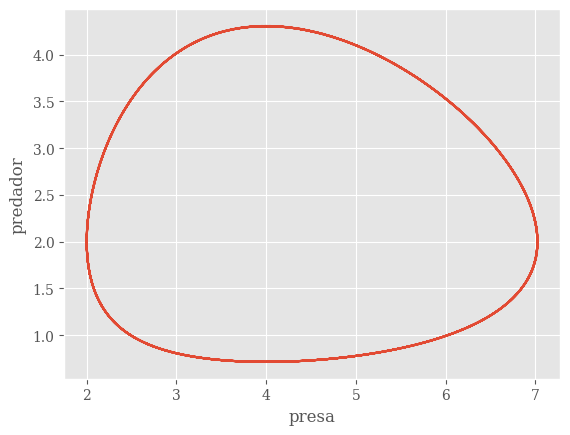

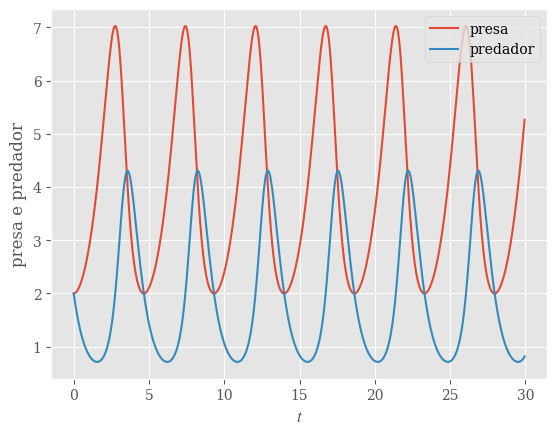

In [25]:
alpha = 1
beta = 0.5
gama = 0.5
delta = 2
x0=y0=2
t0 = 0
tf = 30

M = 2
r = np.zeros((N,M))
r[0] = 2

def f(r):
    x,y = r
    fx = alpha*x - beta*x*y
    fy = gama*x*y - delta*y
    return np.array([fx,fy])
    
for j in range(N-1):
    k1 = h*f(r[j])
    k2 = h*f(r[j] + k1/2)
    k3 = h*f(r[j] + k2/2)
    k4 = h*f(r[j] + k3)
    r[j+1] = r[j] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

x = r[:,0]
y = r[:,1]
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set_xlabel("presa")
ax.set_ylabel("predador")

fig, ax = plt.subplots(1,1)
ax.plot(t,x, label = "presa")
ax.plot(t,y, label = "predador")
ax.set_xlabel("$t$")
ax.set_ylabel("presa e predador")
ax.legend()

## Na vida real
Como sempre, existem métodos "enlatados" para resolver EDOs, dado que são problemas muito comuns em ciência. Em python, podemos usar a função `scipy.integrate.solve_ivp()` (IVP é sigla para *Initial Value Problem*). Esta função tem vários métodos embutidos, incluindo variações do Runge–Kutta. Veja o mesmo exemplo resolvido abaixo, e [leia a documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp).

In [32]:
from scipy.integrate import solve_ivp
import numpy as np

alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

# solve_ivp requer os argumentos em ordem inversa
# do que costumamos usar.
def f(t, r):
    x, y = r
    fx = alpha * x - beta * x * y
    fy = gamma * x * y - delta * y
    return np.array([fx, fy])
    

# t_span é o período de tempo.
# t_eval são os pontos onde queremos saber o valor da solução.
# y0 é a condição inicial.
t0 = 0.0
tf = 30.0
h = 0.05
y0 = [2, 2]
t_s = np.arange(t0, tf, h)
sol = solve_ivp(f, method='RK45', t_span=[t0, tf],
                t_eval=t_s, y0=y0)
print(f'Solução convergiu? {sol["success"]}')
print(f'Mensagem: {sol["message"]}')

Solução convergiu? True
Mensagem: The solver successfully reached the end of the integration interval.


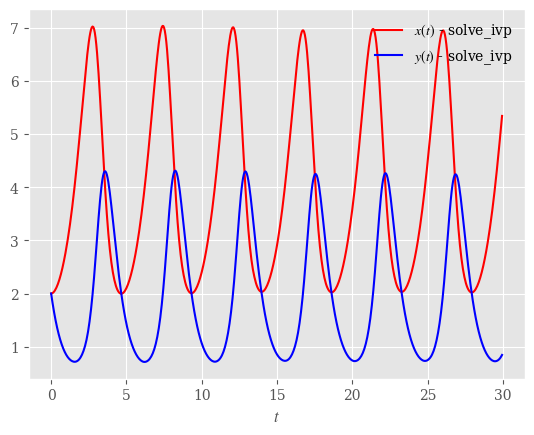

In [33]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
fig, ax = plt.subplots()

x_s = sol.y[0]
y_s = sol.y[1]

ax.plot(t_s, x_s, 'r-', label=f'$x(t)$ - solve_ivp')
ax.plot(t_s, y_s, 'b-', label=f'$y(t)$ - solve_ivp')
ax.set_xlabel('$t$')
ax.legend(frameon=False, loc='upper right')
plt.show()

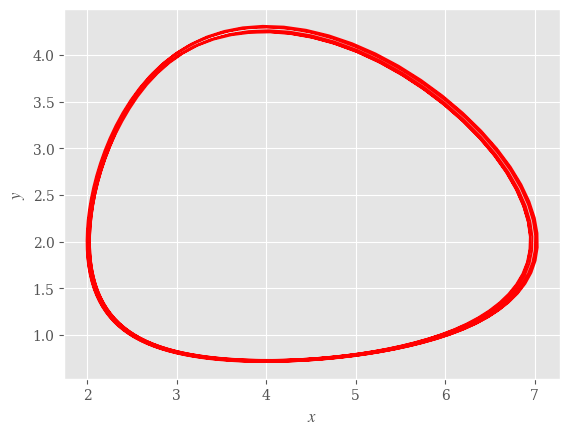

In [34]:
fig, ax = plt.subplots()
ax.plot(x_s, y_s, 'r-')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
plt.show()